In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import shutil
import os
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    r"C:\Users\91963\Desktop\oridata17",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    r"C:\Users\91963\Desktop\oridata17",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 10844 images belonging to 10 classes.
Found 2707 images belonging to 10 classes.


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

Epoch 1/30


c:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


339/339 ━━━━━━━━━━━━━━━━━━━━ 868s 3s/step - accuracy: 0.4855 - loss: 1.4806 - val_accuracy: 0.8489 - val_loss: 0.4518
Epoch 2/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 784s 2s/step - accuracy: 0.8805 - loss: 0.3593 - val_accuracy: 0.9498 - val_loss: 0.1781
Epoch 3/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 781s 2s/step - accuracy: 0.9708 - loss: 0.1017 - val_accuracy: 0.9294 - val_loss: 0.2688
Epoch 4/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 755s 2s/step - accuracy: 0.9793 - loss: 0.0668 - val_accuracy: 0.9775 - val_loss: 0.0656
Epoch 5/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 723s 2s/step - accuracy: 0.9877 - loss: 0.0425 - val_accuracy: 0.9841 - val_loss: 0.0511
Epoch 6/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 728s 2s/step - accuracy: 0.9947 - loss: 0.0191 - val_accuracy: 0.9786 - val_loss: 0.0688
Epoch 7/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 780s 2s/step - accuracy: 0.9898 - loss: 0.0351 - val_accuracy: 0.9882 - val_loss: 0.0482
Epoch 8/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 747s 2s/step - accuracy: 0.9863 - loss: 0.0472 - val_accuracy: 0.984

In [5]:
# Evaluation
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

85/85 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.9950 - loss: 0.0149
Test Accuracy: 99.34%


In [6]:
model.save('data_model.h5')

In [7]:
# Confusion Matrix and Classification Report
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes


85/85 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step


In [8]:
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[24 25 48 18 29 21 42 38 26 21]
 [26 19 26 20 22 25 25 12 20 22]
 [29 25 49 22 15 24 54 37 42 30]
 [23 17 21 17 17 14 37 15 20 20]
 [25 11 14 21 17 17 40 20 26 22]
 [28 19 17 15 14 15 41 21 24 26]
 [44 31 56 33 38 32 71 46 38 43]
 [30 26 35 16 26 16 48 24 24 22]
 [31 26 38 18 21 30 34 30 32 23]
 [33 21 22 18 17 26 40 21 32 25]]


In [9]:
print('Classification Report')
target_names = list(validation_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

Classification Report
                precision    recall  f1-score   support

        Anjali       0.08      0.08      0.08       292
  Ardhachandra       0.09      0.09      0.09       217
Katskaavardanm       0.15      0.15      0.15       327
        Matsya       0.09      0.08      0.09       201
        Mushti       0.08      0.08      0.08       213
        Pataka       0.07      0.07      0.07       220
       Samputa       0.16      0.16      0.16       432
       Shikara       0.09      0.09      0.09       267
    Shivalinga       0.11      0.11      0.11       283
      Vyagraha       0.10      0.10      0.10       255

      accuracy                           0.11      2707
     macro avg       0.10      0.10      0.10      2707
  weighted avg       0.11      0.11      0.11      2707



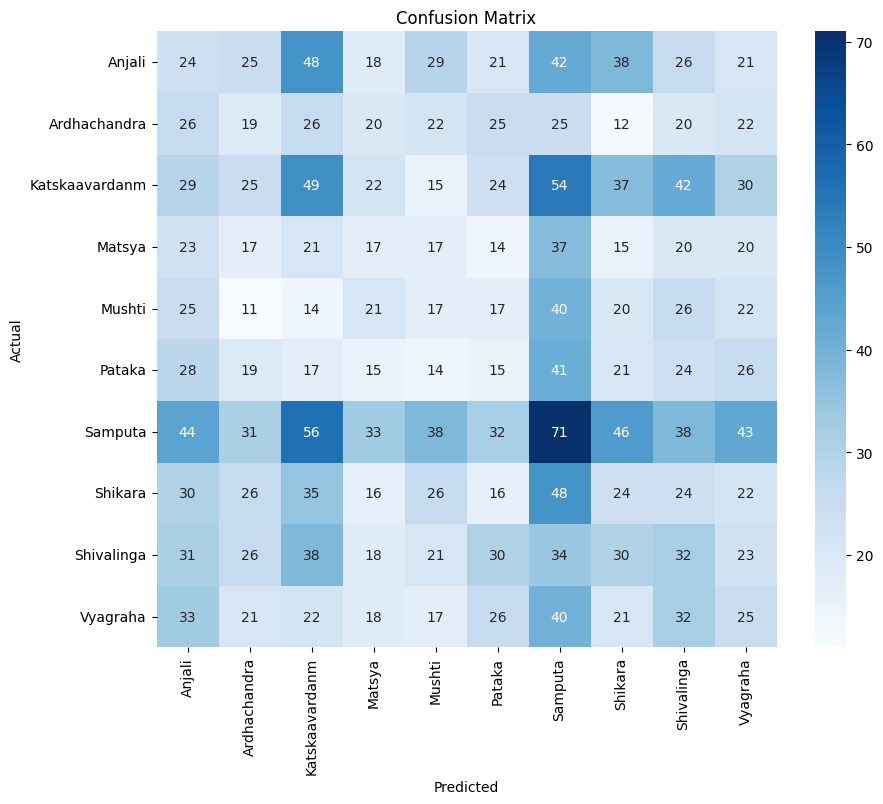

In [10]:
# Plotting the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

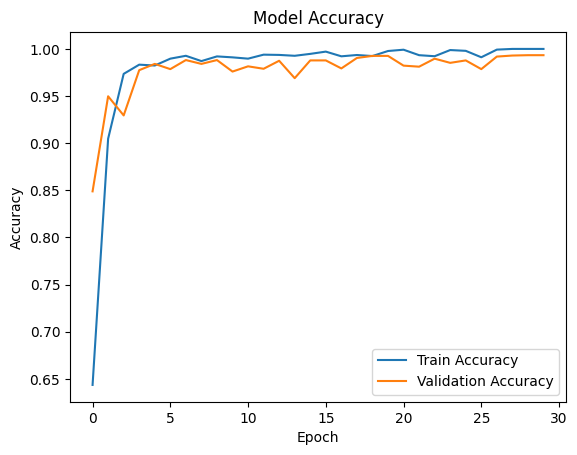

In [11]:
# Optionally, plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

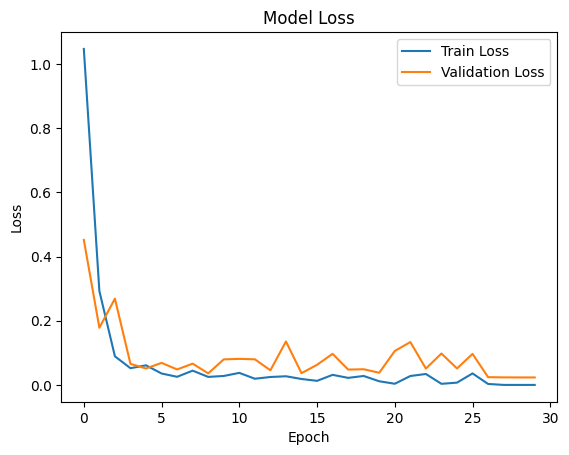

In [12]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()